0. Import

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import sys
sys.path.append("../") 
from scripts.filter_samples import filter_samples

/home/thaongo/anaconda3/envs/hub/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Load dữ liệu

In [2]:
# Xóa dataset cũ nếu có
if "quickstart" in fo.list_datasets():
    fo.delete_dataset("quickstart")
    
dataset = foz.load_zoo_dataset('quickstart')
print(len(dataset))

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [7.9s elapsed, 0s remaining, 19.7 samples/s]      
Dataset 'quickstart' created
200


### 2. Lọc và tìm kiếm ảnh

- Viết script để lọc, tìm kiếm các ảnh theo tag/object hoặc theo label class (sử dụng chức năng filter/query trong FiftyOne).
- Đếm tổng số ảnh có đối tượng cần tìm, và tổng số object loại đó trong toàn bộ dataset.

In [4]:
if len(dataset) == 0:
    print("Dataset is empty.")
    sys.exit(0)

view = filter_samples(dataset, "ground_truth", "person")
total_object_images = len(view)
total_objects = view.count("ground_truth.detections")
print("Tổng số ảnh chứa đối tượng: ",total_object_images)
print("Tổng số đối tượng trong toàn bộ dataset: ",total_objects)

Tổng số ảnh chứa đối tượng:  94
Tổng số đối tượng trong toàn bộ dataset:  378


### 3. Vẽ biểu đồ thống kê

- Vẽ biểu đồ thống kê đơn giản về tần suất xuất hiện các object phổ biến (matplotlib hoặc plotly).

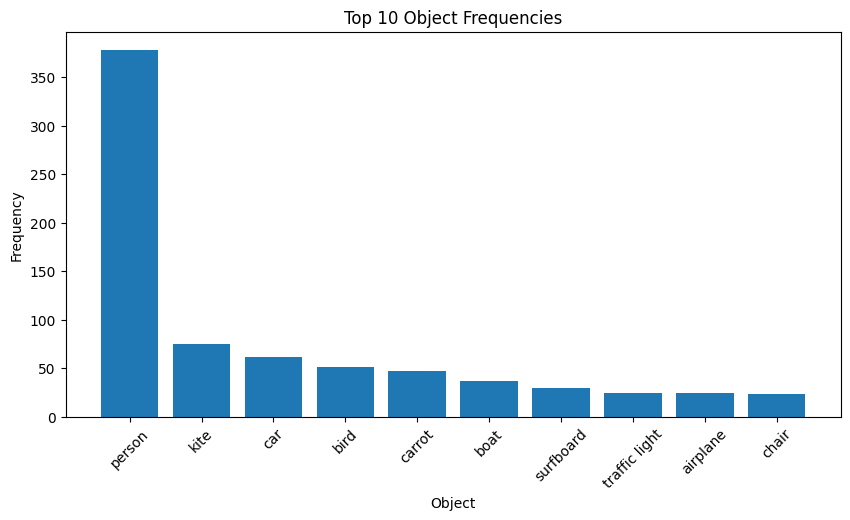

In [6]:
import matplotlib.pyplot as plt

# Lấy danh sách các label phổ biến
counts = dataset.count_values("ground_truth.detections.label")

# Lấy top 10 object phổ biến nhất
top_labels, top_counts = zip(*sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
plt.bar(top_labels, top_counts)
plt.title("Top 10 Object Frequencies")
plt.xlabel("Object")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### 4. Show and Save log

- Hiển thị (show) một số ảnh có object cần tìm trong FiftyOne, xuất ra log danh sách file ảnh tương ứng.

In [8]:
# Hiển thị 5 ảnh đầu tiên có đối tượng "person"
session = fo.launch_app(view)
session.wait(-1)

# Xuất ra log của các file ảnh tương ứng
log_file = "person_images_log.txt"
with open(log_file, "w") as f:
    for sample in view.take(5):
        f.write(sample.filepath + "\n")

Notebook sessions cannot wait
